## Test-plotting

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx

In [3]:
PATH = "../data/Degree_Prevalence_ICD.csv"

In [ ]:
df = pd.read_csv(PATH)

In [ ]:
df = pd.read_csv(PATH)

In [7]:
male = df[df['Sex'] == 'Male']
female = df[df['Sex'] == 'Female']

In [8]:
male

,Sex,Age_Group,ICD_Code,ICD_Description,Degree,Prevalence,Age_Index,Ratio,Log_ratio,Deviation,Outlier
0,Male,age_1,A01,Typhoid and paratyphoid fevers,0,0.00011,1,0.000000,NaN,NaN,False
1,Male,age_1,A02,Other salmonella infections,2,0.00172,1,1162.790698,3.065502,-1.106401,False
2,Male,age_1,A03,Shigellosis,0,0.00003,1,0.000000,NaN,NaN,False
3,Male,age_1,A04,Other bacterial intestinal infections,6,0.00402,1,1492.537313,3.173925,-0.944843,False
4,Male,age_1,A05,"Oth bacterial foodborne intoxications, NEC",0,0.00006,1,0.000000,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...
7280,Male,age_8,N60,Benign mammary dysplasia,0,0.00002,8,0.000000,NaN,NaN,False
7281,Male,age_8,N61,Inflammatory disorders of breast,0,0.00009,8,0.000000,NaN,NaN,False
7282,Male,age_8,N62,Hypertrophy of breast,0,0.00028,8,0.000000,NaN,NaN,False
7283,Male,age_8,N64,Other disorders of breast,0,0.00005,8,0.000000,NaN,NaN,False


In [9]:
male[male['ICD_Code'] == "A01"]

,Sex,Age_Group,ICD_Code,ICD_Description,Degree,Prevalence,Age_Index,Ratio,Log_ratio,Deviation,Outlier
0,Male,age_1,A01,Typhoid and paratyphoid fevers,0,0.00011,1,0.0,NaN,NaN,False
875,Male,age_2,A01,Typhoid and paratyphoid fevers,0,0.00017,2,0.0,NaN,NaN,False
1765,Male,age_3,A01,Typhoid and paratyphoid fevers,0,0.00004,3,0.0,NaN,NaN,False
2684,Male,age_4,A01,Typhoid and paratyphoid fevers,0,0.00007,4,0.0,NaN,NaN,False
3606,Male,age_5,A01,Typhoid and paratyphoid fevers,0,0.00004,5,0.0,NaN,NaN,False
4550,Male,age_6,A01,Typhoid and paratyphoid fevers,0,0.00002,6,0.0,NaN,NaN,False
5477,Male,age_7,A01,Typhoid and paratyphoid fevers,0,0.00002,7,0.0,NaN,NaN,False
6402,Male,age_8,A01,Typhoid and paratyphoid fevers,0,0.00004,8,0.0,NaN,NaN,False


In [10]:
disease_codes = male['ICD_Code'].unique()
selected_diseases = disease_codes[:5]

In [11]:
print(selected_diseases)

['A01' 'A02' 'A03' 'A04' 'A05']


In [12]:
df = pd.read_csv(PATH)
df = df[df['Prevalence'] > 0]
print("Data filtered for Prevalence > 0.")
df = df[df['Degree'] > 0]
print("Data filtered for Degree > 0.")

filtered_df = df[df['Sex'] == 'Male']
# Create the plot
plt.figure(figsize=(12, 8))

for disease in selected_diseases:
    # Filter for the specific disease and sort by age group
    trajectory_df = filtered_df[filtered_df['ICD_Code'] == disease].sort_values('Age_Index')
    disease_description = trajectory_df['ICD_Description'].iloc[0] # Get the description for the legend
    plt.plot(trajectory_df['Prevalence'], trajectory_df['Degree'], marker='o', linestyle='-', label=f'{disease} - {disease_description}')

# Set plot scales and labels
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Prevalence (log scale)')
plt.ylabel('Degree (log scale)')
plt.title('Disease Trajectories for 5 Selected Diseases (Male)')
plt.legend()
plt.grid(True, which="both", ls="--")

Data filtered for Prevalence > 0.
Data filtered for Degree > 0.


IndexError: single positional indexer is out-of-bounds

<Figure size 1200x800 with 0 Axes>

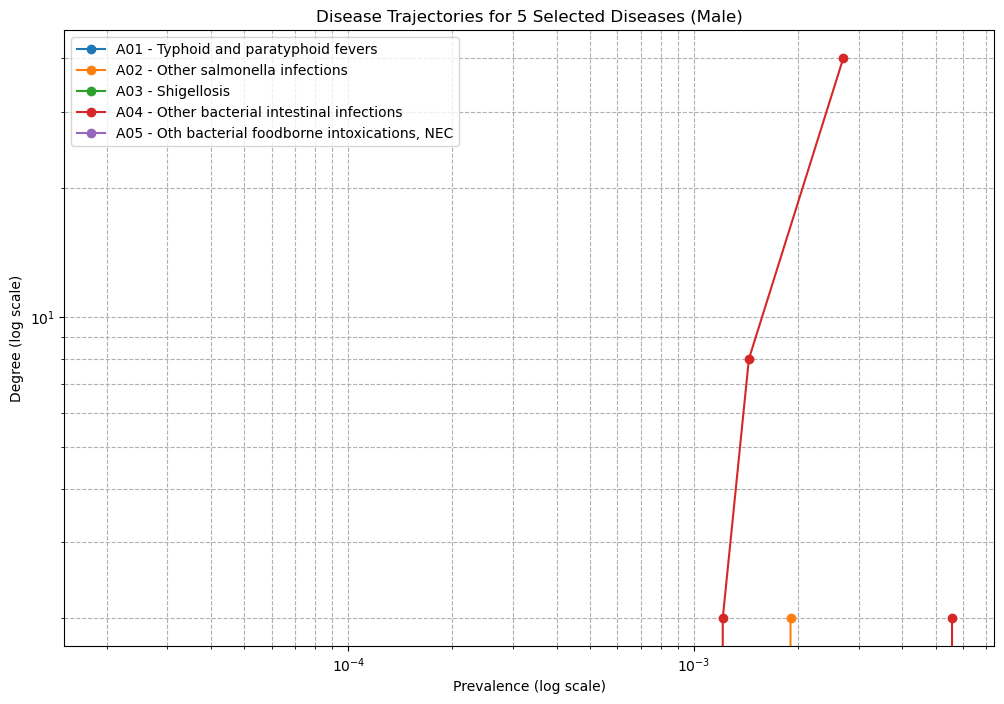

In [21]:
filtered_df = df[df['Sex'] == 'Female']
# Create the plot
plt.figure(figsize=(12, 8))

for disease in selected_diseases:
    # Filter for the specific disease and sort by age group
    trajectory_df = filtered_df[filtered_df['ICD_Code'] == disease].sort_values('Age_Index')
    disease_description = trajectory_df['ICD_Description'].iloc[0] # Get the description for the legend
    plt.plot(trajectory_df['Prevalence'], trajectory_df['Degree'], marker='o', linestyle='-', label=f'{disease} - {disease_description}')

# Set plot scales and labels
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Prevalence (log scale)')
plt.ylabel('Degree (log scale)')
plt.title('Disease Trajectories for 5 Selected Diseases (Male)')
plt.legend()
plt.grid(True, which="both", ls="--")

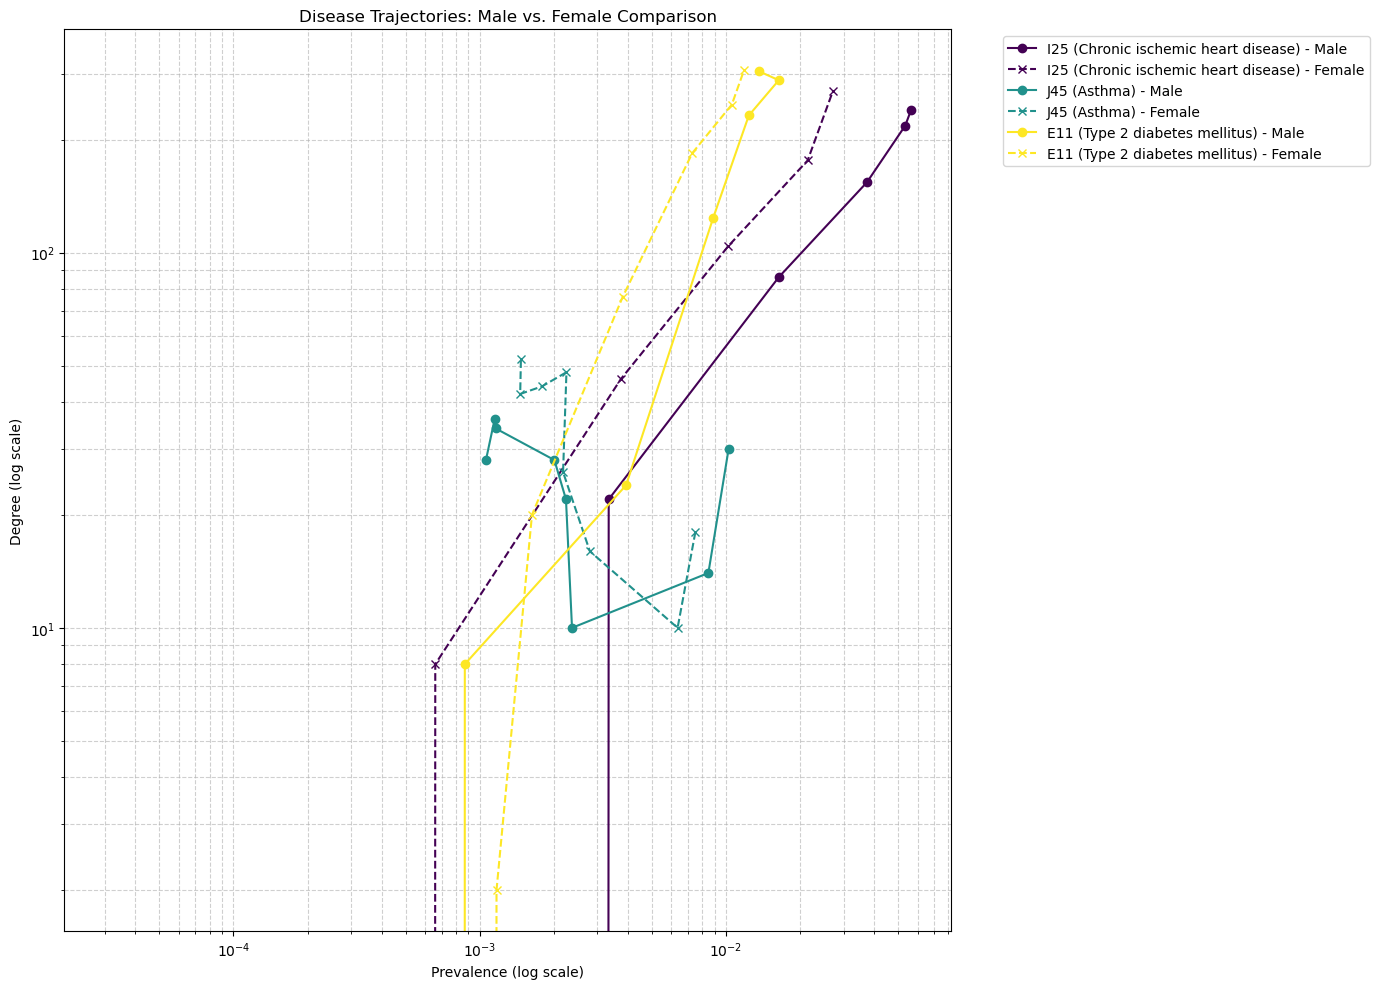

In [6]:
selected_diseases = ['I25', 'J45', 'E11']

# Create the plot
plt.figure(figsize=(14, 10))
ax = plt.gca()

# Define a color map for the diseases
colors = plt.cm.viridis(np.linspace(0, 1, len(selected_diseases)))

# Loop through each selected disease to plot trajectories for both sexes
for i, disease in enumerate(selected_diseases):
    # Filter for the specific disease
    disease_df = df[df['ICD_Code'] == disease]
    if disease_df.empty:
        print(f"Warning: No data found for disease code {disease}. Skipping.")
        continue

    # Get the disease description for the legend
    # We take the first one, assuming it's the same for all entries of this ICD_Code
    disease_description = disease_df['ICD_Description'].iloc[0].strip()

    # --- Plot Male Trajectory ---
    male_trajectory_df = disease_df[disease_df['Sex'] == 'Male'].sort_values('Age_Index')
    if not male_trajectory_df.empty:
        ax.plot(male_trajectory_df['Prevalence'], male_trajectory_df['Degree'],
                marker='o', linestyle='-', color=colors[i],
                label=f'{disease} ({disease_description}) - Male')

    # --- Plot Female Trajectory ---
    female_trajectory_df = disease_df[disease_df['Sex'] == 'Female'].sort_values('Age_Index')
    if not female_trajectory_df.empty:
        ax.plot(female_trajectory_df['Prevalence'], female_trajectory_df['Degree'],
                marker='x', linestyle='--', color=colors[i],
                label=f'{disease} ({disease_description}) - Female')

# --- Final Plot Formatting ---
# Set logarithmic scales for both axes
plt.xscale('log')
plt.yscale('log')

# Set labels and a descriptive title
plt.xlabel('Prevalence (log scale)')
plt.ylabel('Degree (log scale)')
plt.title('Disease Trajectories: Male vs. Female Comparison')

# Add a grid for better readability
plt.grid(True, which="both", ls="--", alpha=0.6)

# Place the legend outside of the plotting area to avoid overlap
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent the legend from being cut off
plt.tight_layout()

# Display the plot
plt.show()

In [5]:
l = ['Female',
 'age_3',
 'C77',
 'Secondary and unspecified malignant neoplasm of lymph nodes',
 np.int64(0),
 np.float64(0.0002),
 np.int64(3),
 np.float64(0.0),
 np.float64(np.nan),
 np.float64(np.nan),
 np.False_]

Data filtered for Prevalence > 0.
Data filtered for Degree > 0.
Data filtered for Age_Index >= 3. The age indexes now being considered are: [np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
6
Plotting the following diseases which have complete data in at least one sex group: ['A09', 'B18', 'C77']


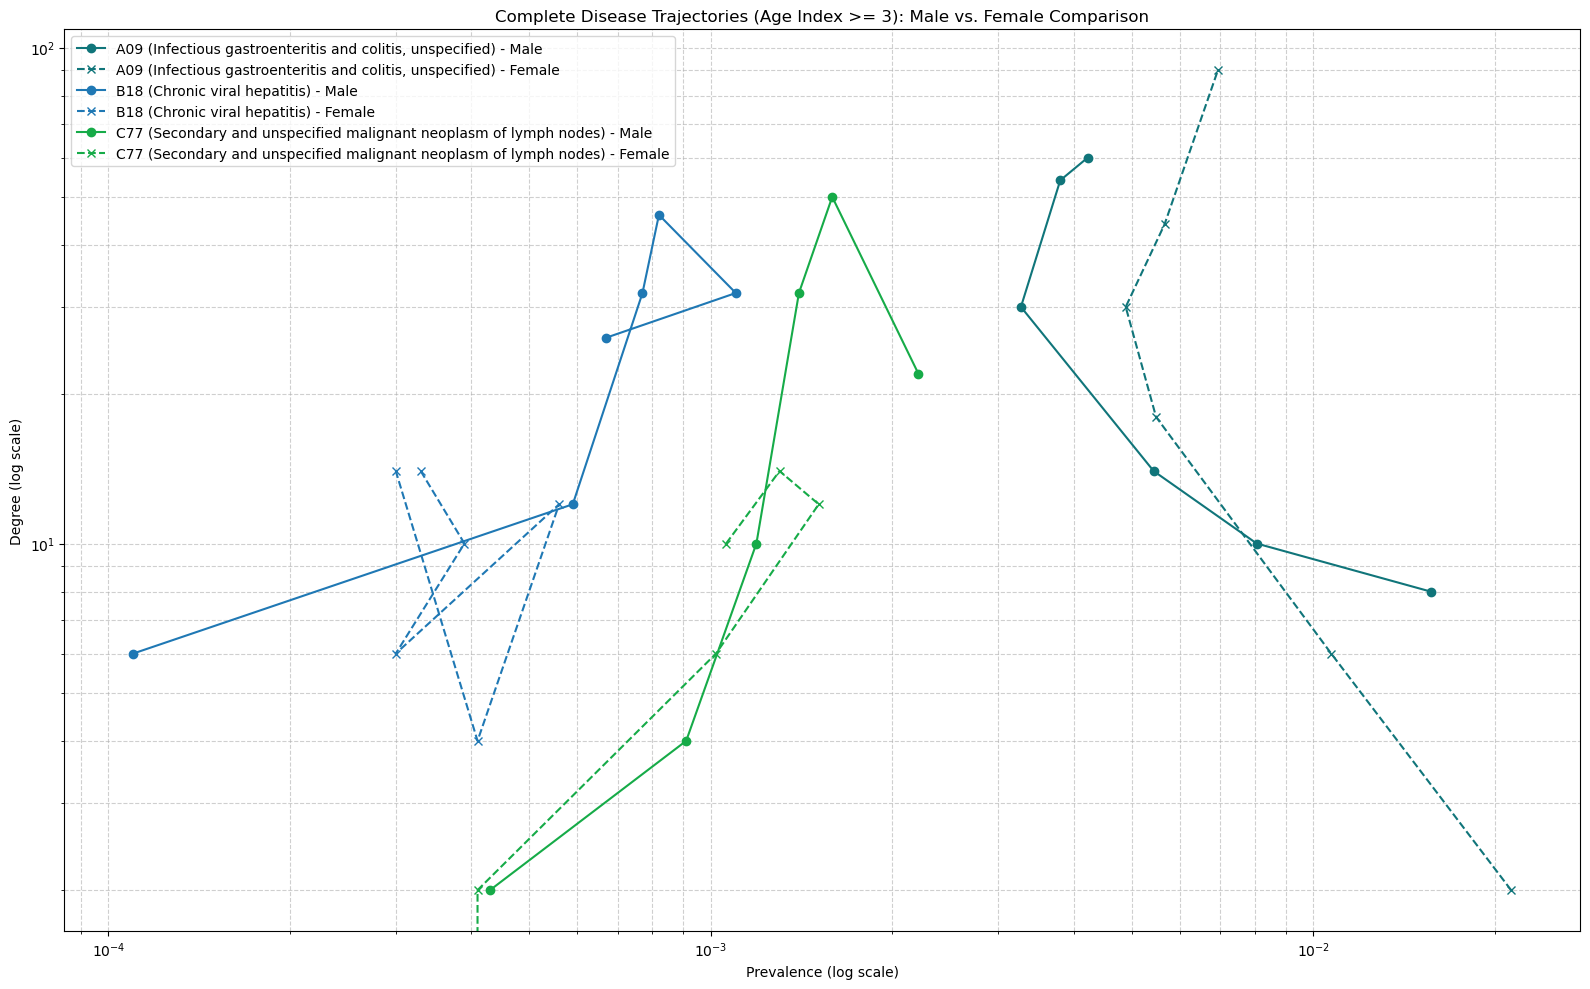

In [13]:

df = pd.read_csv(PATH)
df = df[df['Prevalence'] > 0]
print("Data filtered for Prevalence > 0.")
df = df[df['Degree'] > 0]
print("Data filtered for Degree > 0.")
# Per the request, we only consider age indexes starting from 3.
df = df[df['Age_Index'] >= 3]
print(f"Data filtered for Age_Index >= 3. The age indexes now being considered are: {sorted(df['Age_Index'].unique())}")
#list = 
df.loc[len(df)] = l
# --- Find diseases with complete data within each group (for the filtered age range) ---
# 1. Get all unique age indexes from the filtered dataframe to define a "complete" trajectory
all_age_indexes = sorted(df['Age_Index'].unique())
num_age_indexes = len(all_age_indexes)
print(num_age_indexes)
# 2. Iterate through each disease to find complete trajectories for each sex independently.
male_complete_diseases = []
female_complete_diseases = []
all_icd_codes = df['ICD_Code'].unique()

for icd_code in all_icd_codes:
    disease_df = df[df['ICD_Code'] == icd_code]

    # Check for male completeness
    male_df = disease_df[disease_df['Sex'] == 'Male']
    if len(male_df['Age_Index'].unique()) == num_age_indexes:
        #print("Added disease (MALE) ", icd_code)
        male_complete_diseases.append(icd_code)

    # Check for female completeness
    female_df = disease_df[disease_df['Sex'] == 'Female']
    if len(female_df['Age_Index'].unique()) == num_age_indexes:
        #print("Added disease (FEMALE) ", icd_code)
        female_complete_diseases.append(icd_code)

# Combine the lists to get a set of unique disease codes to plot.
# We will take the first 2 from each list to ensure a mix of diseases is plotted.
combined_list = male_complete_diseases[:3] + female_complete_diseases[:3]
selected_diseases = sorted(list(set(combined_list))) # Use set for uniqueness, then sort for consistency

print(f"Plotting the following diseases which have complete data in at least one sex group: {selected_diseases}")


# Create the plot
plt.figure(figsize=(16, 10))
ax = plt.gca()

# Define a color map for the diseases. Check if list is not empty.
if selected_diseases:
    #colors = plt.cm.viridis(np.linspace(0, 1, len(selected_diseases)))
    colors = ["#10757a", "#1F78B4", "#16ab48", "#33A02C", "#FB9A99", "#E31A1C",
              "#FDBF6F", "#FF7F00", "#CAB2D6", "#6A3D9A", "#FFFF99", "#B15928"]
else:
    colors = []
    print("Warning: No diseases with complete data for either sex were found in the specified age range.")

# Loop through each selected disease to plot its available complete trajectories
for i, disease in enumerate(selected_diseases):
    # Filter for the specific disease
    disease_df = df[df['ICD_Code'] == disease]
    
    # Get the disease description for the legend
    disease_description = disease_df['ICD_Description'].iloc[0].strip()

    # --- Plot Male Trajectory (if available and complete) ---
    male_trajectory_df = disease_df[disease_df['Sex'] == 'Male'].sort_values('Age_Index')
    if disease in male_complete_diseases:
        ax.plot(male_trajectory_df['Prevalence'], male_trajectory_df['Degree'],
                marker='o', linestyle='-', color=colors[i],
                label=f'{disease} ({disease_description}) - Male')

    # --- Plot Female Trajectory (if available and complete) ---
    female_trajectory_df = disease_df[disease_df['Sex'] == 'Female'].sort_values('Age_Index')
    if disease in female_complete_diseases:
        ax.plot(female_trajectory_df['Prevalence'], female_trajectory_df['Degree'],
                marker='x', linestyle='--', color=colors[i],
                label=f'{disease} ({disease_description}) - Female')
    

# --- Final Plot Formatting ---
# Set logarithmic scales for both axes
plt.xscale('log')
plt.yscale('log')

# Set labels and a descriptive title
plt.xlabel('Prevalence (log scale)')
plt.ylabel('Degree (log scale)')
plt.title('Complete Disease Trajectories (Age Index >= 3): Male vs. Female Comparison')

# Add a grid for better readability
plt.grid(True, which="both", ls="--", alpha=0.6)

plt.legend()
# Place the legend outside of the plotting area to avoid overlap
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent the legend from being cut off
plt.tight_layout()

# Display the plot
plt.show()


Data filtered for Prevalence > 0.
Data filtered for Degree > 0.
Data filtered for Age_Index >= 3. The age indexes now being considered are: [np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
6
Plotting the following diseases which have complete data in at least one sex group: ['A09', 'B18', 'C77']


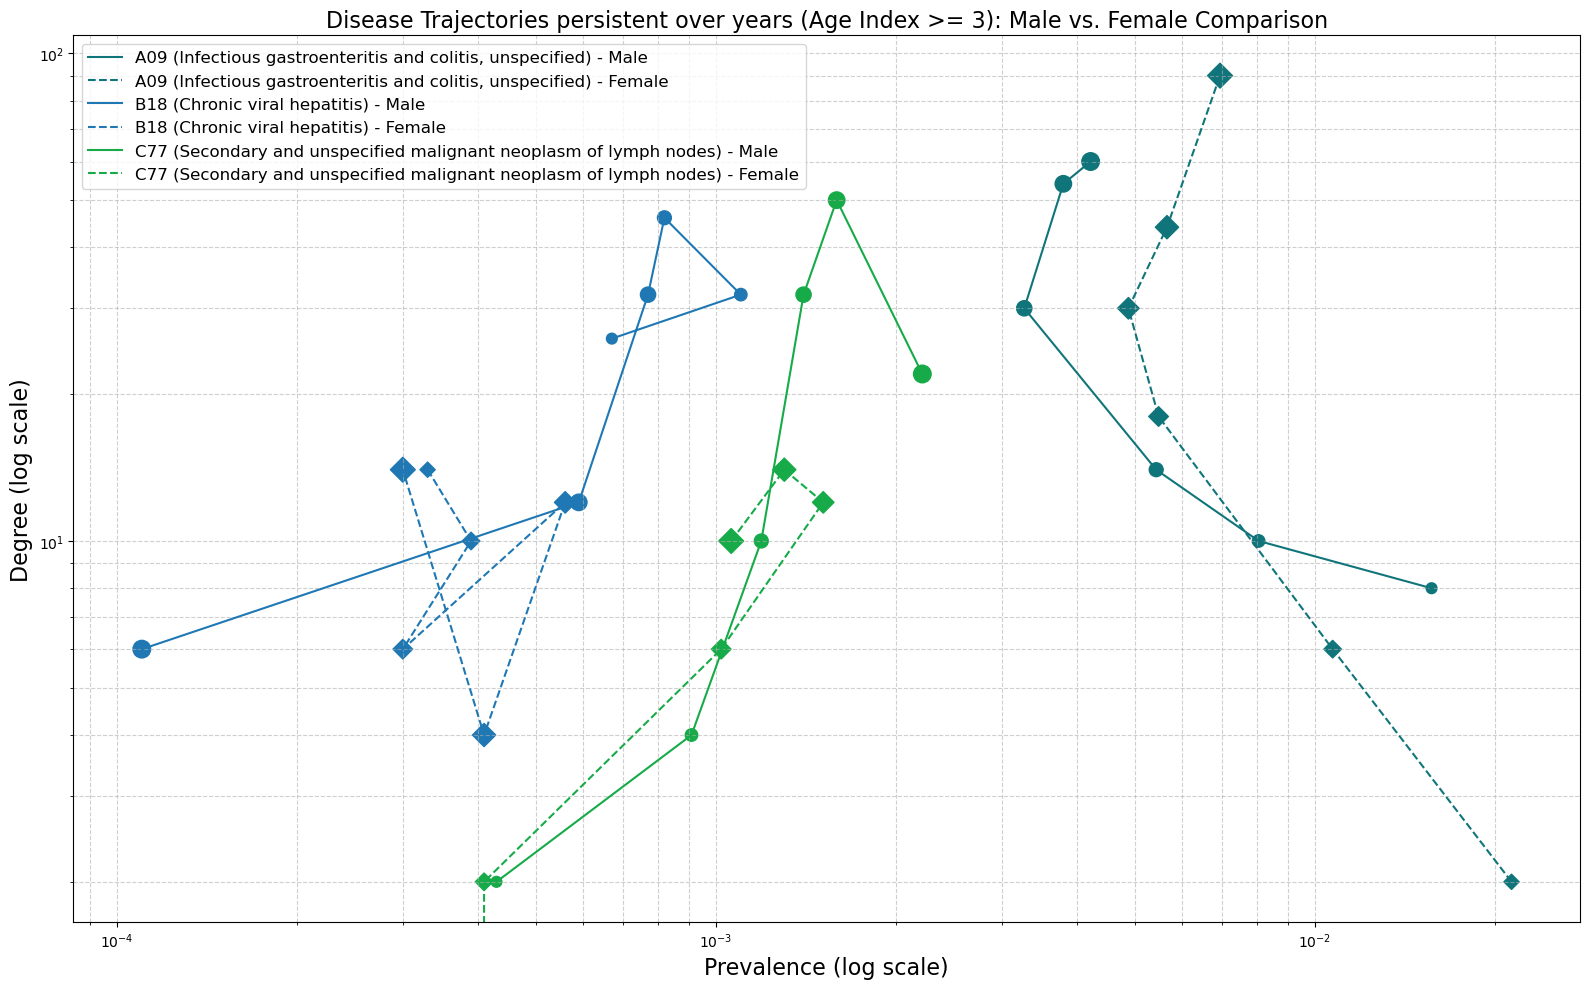

In [18]:

df = pd.read_csv(PATH)
df = df[df['Prevalence'] > 0]
print("Data filtered for Prevalence > 0.")
df = df[df['Degree'] > 0]
print("Data filtered for Degree > 0.")
# Per the request, we only consider age indexes starting from 3.
df = df[df['Age_Index'] >= 3]
print(f"Data filtered for Age_Index >= 3. The age indexes now being considered are: {sorted(df['Age_Index'].unique())}")
#list = 
df.loc[len(df)] = l
# --- Find diseases with complete data within each group (for the filtered age range) ---
# 1. Get all unique age indexes from the filtered dataframe to define a "complete" trajectory
all_age_indexes = sorted(df['Age_Index'].unique())
num_age_indexes = len(all_age_indexes)
print(num_age_indexes)
# 2. Iterate through each disease to find complete trajectories for each sex independently.
male_complete_diseases = []
female_complete_diseases = []
all_icd_codes = df['ICD_Code'].unique()

for icd_code in all_icd_codes:
    disease_df = df[df['ICD_Code'] == icd_code]

    # Check for male completeness
    male_df = disease_df[disease_df['Sex'] == 'Male']
    if len(male_df['Age_Index'].unique()) == num_age_indexes:
        #print("Added disease (MALE) ", icd_code)
        male_complete_diseases.append(icd_code)

    # Check for female completeness
    female_df = disease_df[disease_df['Sex'] == 'Female']
    if len(female_df['Age_Index'].unique()) == num_age_indexes:
        #print("Added disease (FEMALE) ", icd_code)
        female_complete_diseases.append(icd_code)

# Combine the lists to get a set of unique disease codes to plot.
# We will take the first 2 from each list to ensure a mix of diseases is plotted.
combined_list = male_complete_diseases[:3] + female_complete_diseases[:3]
selected_diseases = sorted(list(set(combined_list))) # Use set for uniqueness, then sort for consistency

print(f"Plotting the following diseases which have complete data in at least one sex group: {selected_diseases}")


# Create the plot
plt.figure(figsize=(16, 10))
ax = plt.gca()

# Define a color map for the diseases. Check if list is not empty.
if selected_diseases:
    #colors = plt.cm.viridis(np.linspace(0, 1, len(selected_diseases)))
    colors = ["#10757a", "#1F78B4", "#16ab48", "#33A02C", "#FB9A99", "#E31A1C",
              "#FDBF6F", "#FF7F00", "#CAB2D6", "#6A3D9A", "#FFFF99", "#B15928"]
else:
    colors = []
    print("Warning: No diseases with complete data for either sex were found in the specified age range.")

# Loop through each selected disease to plot its available complete trajectories
# Define a scaling factor for the marker sizes. You can adjust this value.
marker_size_scaling_factor = 20

# Loop through each selected disease to plot its available complete trajectories
for i, disease in enumerate(selected_diseases):
    # Filter for the specific disease
    disease_df = df[df['ICD_Code'] == disease]

    # Get the disease description for the legend
    disease_description = disease_df['ICD_Description'].iloc[0].strip()

    # --- Plot Male Trajectory (if available and complete) ---
    male_trajectory_df = disease_df[disease_df['Sex'] == 'Male'].sort_values('Age_Index')
    if disease in male_complete_diseases:
        # First, plot the line connecting the points
        ax.plot(male_trajectory_df['Prevalence'], male_trajectory_df['Degree'],
                linestyle='-', color=colors[i],
                label=f'{disease} ({disease_description}) - Male')
        # Then, plot the markers with variable size on top of the line
        ax.scatter(male_trajectory_df['Prevalence'], male_trajectory_df['Degree'],
                   s=male_trajectory_df['Age_Index'] * marker_size_scaling_factor,
                   marker='o', color=colors[i])

    # --- Plot Female Trajectory (if available and complete) ---
    female_trajectory_df = disease_df[disease_df['Sex'] == 'Female'].sort_values('Age_Index')
    if disease in female_complete_diseases:
        # First, plot the line connecting the points
        ax.plot(female_trajectory_df['Prevalence'], female_trajectory_df['Degree'],
                linestyle='--', color=colors[i],
                label=f'{disease} ({disease_description}) - Female')
        # Then, plot the markers with variable size on top of the line
        ax.scatter(female_trajectory_df['Prevalence'], female_trajectory_df['Degree'],
                   s=female_trajectory_df['Age_Index'] * marker_size_scaling_factor,
                   marker='D', color=colors[i])

# --- Final Plot Formatting ---
# Set logarithmic scales for both axes

plt.xscale('log')
plt.yscale('log')

# Set labels and a descriptive title

plt.xlabel('Prevalence (log scale)',fontsize=16)
plt.ylabel('Degree (log scale)',fontsize=16)
plt.title('Disease Trajectories persistent over years (Age Index >= 3): Male vs. Female Comparison', fontsize=16)

# Add a grid for better readability
plt.grid(True, which="both", ls="--", alpha=0.6)

plt.legend(fontsize=12)
# Place the legend outside of the plotting area to avoid overlap
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent the legend from being cut off
plt.tight_layout()

# Display the plot
plt.show()


In [47]:
'C77' in female_complete_diseases

False

In [54]:
df = pd.read_csv(PATH)
df = df[df['Sex'] == 'Female']

df = df[df['ICD_Code'] == 'C77']

In [55]:
df

,Sex,Age_Group,ICD_Code,ICD_Description,Degree,Prevalence,Age_Index,Ratio,Log_ratio,Deviation,Outlier
7448,Female,age_1,C77,Secondary and unspecified malignant neoplasm o...,0,0.00004,1,0.000000,NaN,NaN,False
8313,Female,age_2,C77,Secondary and unspecified malignant neoplasm o...,0,0.00010,2,0.000000,NaN,NaN,False
9245,Female,age_3,C77,Secondary and unspecified malignant neoplasm o...,0,0.00020,3,0.000000,NaN,NaN,False
10188,Female,age_4,C77,Secondary and unspecified malignant neoplasm o...,2,0.00041,4,4878.048780,3.688246,-0.178472,False
11143,Female,age_5,C77,Secondary and unspecified malignant neoplasm o...,6,0.00102,5,5882.352941,3.769551,-0.057322,False
12100,Female,age_6,C77,Secondary and unspecified malignant neoplasm o...,12,0.00151,6,7947.019868,3.900204,0.137360,False
13041,Female,age_7,C77,Secondary and unspecified malignant neoplasm o...,14,0.00130,7,10769.230769,4.032185,0.334019,False
13960,Female,age_8,C77,Secondary and unspecified malignant neoplasm o...,10,0.00106,8,9433.962264,3.974694,0.248354,False


In [63]:
l = df[df['Age_Index'] == 3]

In [66]:
l.iloc[0].to_list()

['Female',
 'age_3',
 'C77',
 'Secondary and unspecified malignant neoplasm of lymph nodes',
 np.int64(0),
 np.float64(0.0002),
 np.int64(3),
 np.float64(0.0),
 np.float64(nan),
 np.float64(nan),
 np.False_]

In [81]:
l = ['Female',
 'age_3',
 'C77',
 'Secondary and unspecified malignant neoplasm of lymph nodes',
 np.int64(0),
 np.float64(0.0002),
 np.int64(3),
 np.float64(0.0),
 np.float64(np.nan),
 np.float64(np.nan),
 np.False_]